<a id='top'></a>

# Homework 6: Bootstrapping, Hypothesis Testing, P-Hacking, and Simple Linear Regression 
***

**Name**: Frank Harvey

***

This assignment is due on Moodle by **5 PM on Friday November 30**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**. 

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4) | [Problem 5](#p5)

---

In [630]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats 
%matplotlib inline

---
[Back to top](#top)
<a id='p1'></a>

### [20 points] Problem 1 - Hypothesis Testing: Find-the-Knowledge-Bug 

As part of your job as a seasoned data science consultant, companies often bring you in to supervise their less-experienced data science teams before new product roll-outs.  One one such occasion, you are hired by a medium-sized internet-sales company that is preparing to release a new line of smart-home products.  Prior to their product release the company wants to do a targeted ad campaign to drive traffic to their site on launch day. 

You are asked to pair-up and do some inference work with a new employee named Ketelbells McKnowsNoStats. At various points in your day you catch Ketelbells making the following mistakes.  In each case, clearly explain to Ketelbells why his testing setup or conclusion is incorrect. 

**Part A**: Ketelbells has pulled up some data on the characteristics of customers that visited the company's website over the previous month.  He wants to perform an analysis on the mean age of customers that visit the site.  Let $X$ be the random variable describing the age of a site visitor and suppose that the population mean for $X$ is $\mu$. In particular, Ketelbells wants to see if the data suggests that the mean age of their customers is under 30 years old.   He decides to perform the test with a null hypothesis of $H_0: \mu < 30$. 

Null hypothesis should include a statement of equality, so his null hypothesis should be $H_0 : \mu = 30$.

**Part B**: After the wonderful explanation you gave him after the previous debacle, Ketelbells has seen the error in his ways and decides instead to do his hypothesis test with a null hypothesis of $H_0: \bar{x} = 30$.  

This is closer. And although we will be using $\bar{x}$ (our sample mean) we still want to use $\mu$ in our hypothesis as it is what we are testing against.

**Part C**: Finally on track with reasonable hypotheses of $H_0: \mu = 30$ and $H_1: \mu < 30$, Ketelbells computes a p-value of $0.03$, and thus concludes that there is only a 3% probability that the null hypothesis is true. 

This is not quite right, A: we didn't say what we would and wouldn't reject, and B: this probabilty does not say much about the average person, which could still be younger than 30.

**Part D**: This time, with the hypotheses again $H_0: \mu = 30$ and $H_1: \mu < 30$, Ketelbells computes a normalized test-statistic of $z = -0.04$ for the mean age and concludes that since $z = -0.04 < 0.05$ there is sufficient statistical evidence at the $\alpha = 0.05$ significance level that the mean age of their customers is less than 30.  

you need to transform the z-test statistic into a CDF from -infinity to -.04 and compare that to $\alpha$

---
[Back to top](#top)
<a id='p2'></a>

### [20 points] Problem 2 - Evaluating Vehicle Performance 

A [1983 study](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.34.6358&rep=rep1&type=pdf) evaluated the gas mileage of a variety of cars manufactured between 1970 and 1983. The study also compiled other interesting attributes for each vehicle, but we will focus on the number of cylinders in the engine for this problem. More information on the data is available [here](https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/). Gas mileage is measured in miles-per-gallon, or mpg.

**Part A:** Read the data set and store as a Pandas data frame. You will need figure out what additional arguments to `pd.read_csv()` must be provided in order to read the data set properly.

Then, be sure to give all of the columns informative names, if they do not already have some.

Finally, use `drop_na()` to drop any rows with missing values. Missing values are reported with a "?".

In [631]:
# white space delimited, "?" used for unknowns, headers are:
#     1. mpg:           continuous
#     2. cylinders:     multi-valued discrete
#     3. displacement:  continuous
#     4. horsepower:    continuous
#     5. weight:        continuous
#     6. acceleration:  continuous
#     7. model year:    multi-valued discrete
#     8. origin:        multi-valued discrete
#     9. car name:      string (unique for each instance)

dfMPG = pd.read_csv('data/auto-mpg.data', delim_whitespace=True, names=["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "car name"], na_values="?").dropna()

dfMPG.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


**Part B**: Assuming the data in this sample are representative of cars from the 1970-1983 time period, find a 95% confidence interval for the mean gas mileage (mpg) of all vehicles from this period. Can we conclude that the mean gas mileage is higher than 20 mpg? Be sure to show all calculations in Python. 

Our confidence interval spans from 22.7 mpg to 24 mpg, so we can be 95% confident (based on the assumption) that cars produced in this era had gas efficiencies greater than 20mpg.

In [632]:
x_bar = dfMPG['mpg'].mean()
numOfSamples = len(dfMPG)
sigma = dfMPG['mpg'].std()
alpha = 0.05
zAover2 = stats.norm.ppf(1 - alpha/2)

CI = [x_bar - zAover2*(sigma/np.sqrt(numOfSamples)), x_bar + zAover2*(sigma/np.sqrt(numOfSamples))]

print (zAover2)
print("CI: %s" % CI)

1.95996398454
CI: [22.673276244152817, 24.218560490541066]


**Part C**: You are considering buying a new car, but since [gas prices have recently increased dramatically](https://www.energy.gov/eere/vehicles/fact-915-march-7-2016-average-historical-annual-gasoline-pump-price-1929-2015), you are concerned about getting good fuel economy.

Can you conclude at the $\alpha=0.01$ significance level that the mean gas mileage for vehicles with 4 or 6 cylinder engines is more than 10 mpg better than the mean gas mileage for vehicles with 8 cylinder engines? You may consider two populations here: those vehicles with 4 or 6 cylinders, and those vehicles with 8 cylinders in their engines. Be sure to clearly describe your hypotheses and methodology, and show all relevant computations in Python. 

With 99% certainty we can say that 4 or 6 cylinder cars get at least 10 miles per gallon better on average than an 8 cylinder car. We see this in the confidence interval that spans from a difference of -12.8 to -10.3.

In [633]:
fourOrSix = dfMPG.loc[(dfMPG["cylinders"] == 4) | (dfMPG["cylinders"] == 6)]
eight = dfMPG.loc[dfMPG["cylinders"] == 8]
alpha = 0.01
zAover2 = stats.norm.ppf(1 - alpha/2)

four_six_x_bar = fourOrSix['mpg'].mean()
four_six_numOfSamples = len(fourOrSix)
four_six_sigma = fourOrSix['mpg'].std()


eight_x_bar = eight['mpg'].mean()
eight_numOfSamples = len(eight)
eight_sigma = eight['mpg'].std()

CI = [(eight_x_bar - four_six_x_bar) - zAover2*np.sqrt(pow(eight_sigma,2)/eight_numOfSamples + pow(four_six_sigma,2)/four_six_numOfSamples), (eight_x_bar - four_six_x_bar) + zAover2*np.sqrt(pow(eight_sigma,2)/eight_numOfSamples + pow(four_six_sigma,2)/four_six_numOfSamples)]

print("CI: %s" % CI)

CI: [-12.836312926324004, -10.324707523996173]


**Part D**: You decide to go with either a 4 or 6 cylinder engine, because if you buy an 8-cylinder vehicle that can haul heavy things, you just know you are going to get stuck helping people move. You just _know_ it.

Conduct an appropriate hypothesis test at the $\alpha=0.01$ significance level to determine if the mean gas mileage of vehicles with a 4-cylinder engine is significantly better than the gas mileage of vehicles with 6 cylinders. Be sure to clearly describe your hypotheses and methodology, and show all relevant computations in Python. 

I only want to test that the mean MPG for a 4 cylinder car is better than the mean MPG for a 6 cylinder car with 99% confidence. As we can see by the calculation the confidence interval covers from -10.8 to -7.8 so we can conclude with 99% confidence that 4 cylinder cars from this era get better fuel efficiency than six cylinder cars. We can also say with 99% confidence that 4 cylinder cars get better fuel efficiency by at least 7.8 MPG.

In [634]:
four = dfMPG.loc[dfMPG["cylinders"] == 4]
six = dfMPG.loc[dfMPG["cylinders"] == 6]
alpha = 0.01
zAover2 = stats.norm.ppf(1 - alpha/2)

four_x_bar = four['mpg'].mean()
four_numOfSamples = len(four)
four_sigma = four['mpg'].std()


six_x_bar = six['mpg'].mean()
six_numOfSamples = len(six)
six_sigma = six['mpg'].std()

CI = [(six_x_bar - four_x_bar) - zAover2*np.sqrt(pow(six_sigma,2)/six_numOfSamples + pow(four_sigma,2)/four_numOfSamples), (six_x_bar - four_x_bar) + zAover2*np.sqrt(pow(six_sigma,2)/six_numOfSamples + pow(four_sigma,2)/four_numOfSamples)]

print("CI: %s" % CI)

CI: [-10.808414208391468, -7.8124370357812154]


---
[Back to top](#top)
<a id='p3'></a>

### [20 points] Problem 3 - Naps vs Coffee for Memory? 

It is estimated that [about 75% of adults](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4997286/) in the United States drink coffee. Often, coffee is used to replace the need for sleep. It works alright, or so we think. Let's find out, in this exciting homework problem!

[One recent study](https://www.sciencedirect.com/science/article/pii/S1388245703002554) investigated the effects of drinking coffee, taking a nap, and having a ["coffee-nap"](https://lifehacker.com/naps-vs-coffee-which-is-better-when-youre-exhausted-1730643671) - the practice of drinking some coffee *and then* having a short nap. The study broke participants up into three groups of 10 participants each, where the groups would have a nap, or have a coffee, or have a coffee-nap, then perform a task where their reaction time was measured. In previous experiments the mean reaction time measurement was found to be normally distributed. The reaction time means (milliseconds, ms) and standard deviations for the three groups of participants are given in the table below.

$$
\begin{array}{c|c|c|c}
\textrm{Group} & \textrm{Sample Size} & \textrm{Mean} & \textrm{Standard Deviation} \\
\hline 
\textrm{Coffee+Nap} & 10 & 451.3 & 31.9 \\ 
\textrm{Coffee} & 10 & 494.2 & 39.6 \\ 
\textrm{Nap} & 10 & 492.8 & 45.2 \\ 
\end{array}
$$

**Part A**: Compute 95% t-confidence intervals for the mean reaction time measurement for participants in each of these three groups. (You should find three separate confidence intervals.) Do all computations in Python by hand, and report the results.

1. Can you make any conclusions regarding whether coffee, naps or both (coffee-naps) are better for faster reaction times?
2. Why did we use a t-distribution?

We will calculate the various confidence intervals using $$t=\frac{\mu_1-\mu_2-C}{\sqrt{\frac{\sigma_1^2}{n}+\frac{\sigma_2^2}{n}}}$$

We can then check its significance by doing $\hat{p} = 1-\phi(t)$ and seeing if this outperforms 95%.

I'll assume there is no difference in means as my $H_0$ null hypothesis. 

1. The "Coffee + Nap" has the lowest sample mean, and performs best against both "Coffee" and "Nap" in the t-tests.
    * `CNCp`, a p_value between "Coffee + Nap" and "Coffee" shows with >99% confidence that "Coffee + Nap" outperforms "Coffee".
    * `CNNp`, a p_value between "Coffee + Nap" and "Nap" shows with >99% confidence that "Coffee + Nap" outperforms "Coffee".
    * `CNp`, a p_value between "Coffee" and "Nap" shows with only ~45% confidence that "Coffee" outperforms "Nap". I'd say, in this case, it'd be better to say that "Nap" out performs "Coffee" ~55% of the time. This is not very statistically important.

2. We do not know the standard deviation, which would have allowed us to use a z-score, so a t-distribution is a good way to go. 

In [635]:
# CI for "Coffee + Nap" and "Coffee"
C=0
CNCt = (451.3-494.2-C)/np.sqrt(pow(31.9,2)/30 + pow(39.6,2)/30)
CNCp = 1-stats.norm.cdf(CNCt)
CNNt = (451.3-492.8-C)/np.sqrt(pow(31.9,2)/30 + pow(45.2,2)/30)
CNNp = 1-stats.norm.cdf(CNNt)
CNt = (494.2-492.8-C)/np.sqrt(pow(39.6,2)/30 + pow(45.2,2)/30)
CNp = 1-stats.norm.cdf(CNt)
print("Coffee + Nap vs. Coffee: ",CNCp)
print("Coffee + Nap vs. Nap: ",CNNp)
print("Coffee vs. Nap: ",CNp)

Coffee + Nap vs. Coffee:  0.999998089253
Coffee + Nap vs. Nap:  0.999980103301
Coffee vs. Nap:  0.449231345072


**Part B**: Use an appropriate hypothesis test to determine if there sufficient evidence, at the $\alpha = 0.05$ significance level, to conclude that taking a nap promotes faster reaction time than drinking coffee.  Be sure to clearly explain the test that you're doing and state all hypotheses. Do all computations in Python, and report results.

$H_0: \mu_1-\mu_0 = 0$

$H_1: \mu_1-\mu_0 > 0$

I ran a confidence interval in the difference of means, rejected my null hypothesis that the difference would be 0, and accepted my alternate that the difference would be greater than 0 due to my confidence interval of [11.383133127186859, 74.416866872813102].

In [644]:
alpha = 0.05
zAover2 = stats.norm.ppf(1 - alpha/2)

mu_0 = 451.3
n_0 = 10
sigma_0 = 31.9

mu_1 = 494.2
n_1 = 10
sigma_1 = 39.6

CI = [(mu_1 - mu_0) - zAover2*np.sqrt(pow(sigma_1,2)/n_1 + pow(sigma_0,2)/n_0), (mu_1 - mu_0) + zAover2*np.sqrt(pow(sigma_1,2)/n_1 + pow(sigma_0,2)/n_0)]

print("CI: %s" % CI)

CI: [11.383133127186859, 74.416866872813102]


**Part C**: Use an appropriate hypothesis test to determine if there is sufficient evidence, at the $\alpha = 0.05$ significance level, to conclude that taking a coffee-nap promotes faster reaction time than only drinking coffee, or only having a nap.  Be sure to clearly explain the test that you're doing and state all hypotheses. Do all computations in Python, and report results.

**Part D**: Compute a 95% confidence interval for the standard deviation of reaction time for coffee-nap takers. Do all computations in Python, and report the results.

The SD confidence interval is `[21.941943095293087, 58.236964822374411]` and our sampled standard deviation is within our 95% confidence interval.

In [652]:
alpha = .05
sigma = 31.9
n = 10
CI = [sigma*np.sqrt((n-1)/stats.chi2.ppf((1-alpha/2), n-1)), sigma*np.sqrt((n-1)/stats.chi2.ppf((alpha/2), n-1))]
CI

[21.941943095293087, 58.236964822374411]

---
[Back to top](#top)
<a id='p4'></a>

### [20 points] Problem 4 - Bad Science for Fun and Profit 

[Data Dredging](https://en.wikipedia.org/wiki/Data_dredging) and [p-hacking](https://www.explainxkcd.com/wiki/index.php/882:_Significant) are umbrella terms for the dangerous practice of automatically testing a large number of hypotheses on the entirety or subsets of a single dataset in order to find statistically significant results. In this exercise we will focus on the idea of testing hypotheses on subsets of a single data set.  

Nefaria Octopain has landed her first data science internship at an aquarium.  Her primary summer project has been to design and test a new feeding regimen for the aquarium's octopus population. To test her regimen, her supervisors have allowed her to deploy her new feeding regimen to 4 targeted octopus subpopulations of 40 octopuses each, every day, for a month. 

The effectiveness of the new diet is measured simply by the rate at which the food is consumed, which is simply defined to be the _proportion_ of octopuses that eat the food (POOTEF). The aquarium's standard octopus diet has a POOTEF of $0.90$.  Nefaria is hoping to land a permanent position at the aquarium when she graduates, so she's **really** motivated to show her supervisors that the POOTEF of her new diet regimen is a (statistically) significant improvement over their previous diet. 

The data from Nefaria's summer experiment can be found in `pootef.csv`. Load this dataset as a Pandas DataFrame. 

In [636]:
octoFrame = pd.read_csv("data/pootef.csv", header=0)

# this is, like, the dumbest possible way to do this, but it was the first way I got to work so I'm sticking to it
# its four repeating DF's of Oct 1 - Oct 31
dates = pd.DataFrame({"Date": pd.date_range("2018-10-01", "2018-10-31")}).append(pd.DataFrame({"Date": pd.date_range("2018-10-01", "2018-10-31")}),ignore_index=True)
dates = dates.append(pd.DataFrame({"Date": pd.date_range("2018-10-01", "2018-10-31")}).append(pd.DataFrame({"Date": pd.date_range("2018-10-01", "2018-10-31")}),ignore_index=True),ignore_index=True)

octoFrame["Date"] = dates
octoFrame["POOTEF"] = octoFrame.apply(lambda row: row['Ate'] / row['Fed'], axis=1)
octoFrame.head()

,Group,Date,Fed,Ate,POOTEF
0,1,2018-10-01,40,37,0.925
1,1,2018-10-02,40,37,0.925
2,1,2018-10-03,40,35,0.875
3,1,2018-10-04,40,35,0.875
4,1,2018-10-05,40,36,0.900


**Part A**: State the null and alternate hypotheses that Nefaria should test to see if her new feeding regimen is an improvement over the aquarium's standard feeding regimen with a POOTEF of $0.90$. 

$$H_0: POOTEF = 0.90$$
$$H_1: POOTEF > 0.90$$

**Part B**: Test the hypothesis from **Part A** at the $\alpha = 0.01$ significance level using a p-value test. Is there sufficient evidence for Nefaria to conclude that her feeding regimen is an improvement?   

In [637]:
# Did a quick CI just to practice ##
POOTEF_bar = octoFrame['POOTEF'].mean()
POOTEF_numOfSamples = len(octoFrame)
POOTEF_sigma = octoFrame['POOTEF'].std()
alpha = 0.01
zAover2 = stats.norm.ppf(1 - alpha/2)

CI = [POOTEF_bar - zAover2*(POOTEF_sigma/np.sqrt(POOTEF_numOfSamples)), POOTEF_bar + zAover2*(POOTEF_sigma/np.sqrt(POOTEF_numOfSamples))]

print("CI: %s" % CI)

def p_value_test(df, p_null=.9, attr="POOTEF", alpha = 0.01, supress=False):
    if not supress:
        print("*** p_value_test running")
    p_hat = df[attr].mean()
    n = len(df)
    sigma_null = np.sqrt((p_null*(1-p_null))/n)
    z = (p_hat - p_null)/sigma_null
    p_val = 1 - stats.norm.cdf(z)
    if not supress:
        print("p_hat : %s, sigma_null: %s" % (p_hat, sigma_null))
    if p_val<=alpha:
        if not supress:
            print("P Value Test Succeeded, (p_val of %s) <= (alpha of %s)" % (p_val,alpha))
        return {"succeed": True, "p_val": p_val}
    else:
        if not supress:
            print("p_value Test Failed: (p_val of %s) > (alpha of %s)" % (p_val,alpha))
        return {"succeed": False, "p_val": p_val}


p_value_test(octoFrame)

CI: [0.89140489301476977, 0.91303059085619798]
*** p_value_test running
p_hat : 0.9022177419354839, sigma_null: 0.026940795304
p_value Test Failed: (p_val of 0.467196484469) > (alpha of 0.01)


{'p_val': 0.46719648446856632, 'succeed': False}

I ran a CI to double check my work (its what is commented out above). The p value I get is **much** larger than $\alpha = .01$ so this does not reject my null hypothesis. I ran the CI, which includes 0.90 so I cannot safely say that the new POOTEF value is not statistically better.

**Part C**: Bummer, Nefaria thinks. This is the part where she decides to resort to some questionable science.  Maybe there is a reasonable _subset_ of the data for which her alternative hypothesis is supported?  Can she find it?  Can she come up for a reasonable justification for why this subset of the data should be considered while the rest should be discarded? 

Here are the **rules**: Nefaria cannot modify the original data (e.g. by adding nonexistent feedings or bites to certain groups or days) because her boss will surely notice.  Instead she needs to find a subset of the data for which her hypothesis is supported by a p-value test at the $\alpha = 0.01$ significance level _and_ be able to explain to her supervisors why her sub-selection of the data is reasonable.  

In addition to your explanation of why your successful subset of the data is potentially reasonable, be sure to thoroughly explain the details of the tests that you perform and show all of your Python computation.  

In [638]:
# day of the week
day_week = []
for i in range(7):
    questionableOctoFrame = octoFrame.loc[(octoFrame["Date"].dt.dayofweek == i)]
    day_week.append(p_value_test(questionableOctoFrame, supress=True)['p_val'])
print("Day of week: ", day_week)
    
# date divisible
date_div = []
for i in range(1,15):
    questionableOctoFrame = octoFrame.loc[(octoFrame["Date"].dt.day % i == 0)]
    date_div.append(p_value_test(questionableOctoFrame, supress=True)['p_val'])
print("Date visible by:", date_div)

group = []
for i in range(1,5):
    questionableOctoFrame = octoFrame.loc[(octoFrame["Group"] == i)]
    group.append(p_value_test(questionableOctoFrame, supress=True)['p_val'])
print("Group: ", group)



# catch = False
# while catch is not True:
#     questionableOctoFrame = octoFrame.sample(n=60)
#     catch = p_value_test(questionableOctoFrame, supress=True)
# print (questionableOctoFrame)

Day of week:  [0.5, 0.51486426008737474, 0.52970789208512459, 0.41748435317947752, 0.40936968967191889, 0.4420264805023395, 0.59063031032808166]
Date visible by: [0.46719648446856632, 0.53856714963831576, 0.49999999999999911, 0.44987064934358589, 0.43916242505051861, 0.52970789208512659, 0.59063031032808166, 0.51918671684693118, 0.47123379370720908, 0.5, 0.55855787424935333, 0.44144212575064756, 0.45309280787746431, 0.59316814211660418]
Group:  [0.50597078947232232, 0.35971877221169535, 0.52386978960300823, 0.54765420300511114]


This was really hard for me. The more I paired down my data to increase my `p_hat` the more I increased my standard deviation, which in return made it harder to get a lower `p_value`. This makes sense, the less data you sample, the less confident you can be to reject a hypothesis. The `p_value` test is basically saying "you're not far enough past the standard deviation to safely say we can reject $H_0$".

After a really long time trying this I finally tried `questionableOctoFrame = octoFrame.loc[(octoFrame["Ate"] > 37)]` and still didn't succeed, so some part of my implementation must be off, as sure getting only high proportions should lead to a successful p_value test.

However I tried a lot along the way. I ran through every day of the week, by doing `octoFrame.loc[(octoFrame["Date"].dt.dayofweek == i)]` and seeing if I could get a lower p_value from that. I then tried `octoFrame.loc[(octoFrame["Date"].dt.day % i == 0)]` to see if going every other day, every third day, every fourth day, etc. would get a better p_value. I then going group by group by doing `octoFrame.loc[(octoFrame["Group"] == i)]` to see if one group performs better (Group 2 does). I then combined some of the best performing filters, none of which got me a p_value any lower than .3. I then tried just randomly sampling 60 samples until I got a success, and that ran for like 5 minutes without success (LOL). So, as others in Piazza, I think the way I calculate `n` is wrong.

---
[Back to top](#top)
<a id='p5'></a>

### [20 points] Problem 5 - Simple Linear Regression for the Consumption of Ice Cream Treats

[Usain O'Flaherty](https://www.youtube.com/watch?v=LVeLz0FIj9A), the famous octopus athlete of the distinguished O'Flaherty family, has been keeping careful track of how much ice cream he eats after his training runs. He has stored the data in `icecream.csv`, where his ice cream consumption is measured in number of scoops, and his run distances are saved in units of miles. In this exercise you will construct a simple linear regression model for the response variable "amount of ice cream consumed" (`scoops`), using "number of miles run" (`miles`) as the feature. Load the data into a Pandas DataFrame.

In [639]:
dfTreats = pd.read_csv("data/icecream.csv")
dfTreats.head()

,miles,scoops
0,14.300531,8.922252
1,9.361511,4.720254
2,13.929330,8.567314
3,12.673436,8.855122
4,16.055107,9.409772


**Part A**: Perform a simple linear regression with `miles` as the feature and `scoops` as the response.  Report the estimated regression model in the form $Y = \alpha + \beta x$. Do all computations in Python. 

In [640]:
miles_bar = dfTreats["miles"].mean()
scoops_bar = dfTreats["scoops"].mean()
n = len(dfTreats)
num = 0
denom = 0
for i in range(n):
    num += (dfTreats["miles"].iloc[0]-miles_bar)*(dfTreats["scoops"].iloc[0]-scoops_bar)
    denom += pow((dfTreats["miles"].iloc[0]-miles_bar),2)
beta_hat = num/denom
alpha_hat = scoops_bar-beta_hat * miles_bar
print("Y = %.2f + %.2fx" % (alpha_hat,beta_hat))

Y = 2.72 + 0.43x


**Part B**: Make a scatter-plot of the data with `miles` as the feature and `scoops` as the response, and overlay the estimated regression line.  Clearly label all relevant plot elements and include a legend.

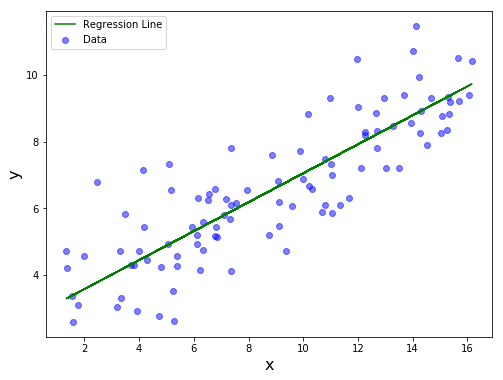

In [641]:
# taken straight from https://github.com/dblarremore/csci3022/blob/master/notebooks/nb20_regression.ipynb

fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(8,6))
ax.scatter(dfTreats["miles"],dfTreats["scoops"],color="blue",alpha=".5",label="Data")
ax.plot(dfTreats["miles"],alpha_hat+dfTreats["miles"]*beta_hat,color="green",label="Regression Line")
ax.set_xlabel("x", fontsize=16)
ax.set_ylabel("y", fontsize=16)
plt.legend()

**Part C**: Give a physical interpretation of the coefficients $\hat{\alpha}$ and $\hat{\beta}$, estimated from your model. Is the relationship between run lengths and ice cream consumption positive or negative? Fully justify your responses.

**Part D**: How much ice cream does your simple linear regression model predict the runner will consume if they run a marathon (26.2 miles)? What are potential drawbacks to this model for ice cream consumption?

In [642]:
def model_ice_cream(x,alpha_hat=2.7165711057398911,beta_hat=0.43394756878123192):
    return alpha_hat + x * beta_hat

model_ice_cream(26.2)

14.085997407808167

My model estimates 14.1 scoops of ice cream. This model has no upper or lower bounds, which seems pretty unrealistic, as certainly an octopus has an upper bound of how much ice cream they can eat. 

**Part E:** Compute a 66% confidence interval for the slope parameter, $\beta$, ***by hand***. This means performing all calculations yourself in Python, as opposed to calling a simple Python function that gives you the result.

In [643]:
# a = .34
# p = 1 - a/2
# sigma = dfTreats["scoops"].std()


**Part F**: Are there any other features you think should be added to the model, making this a *multiple* linear regression model?